ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

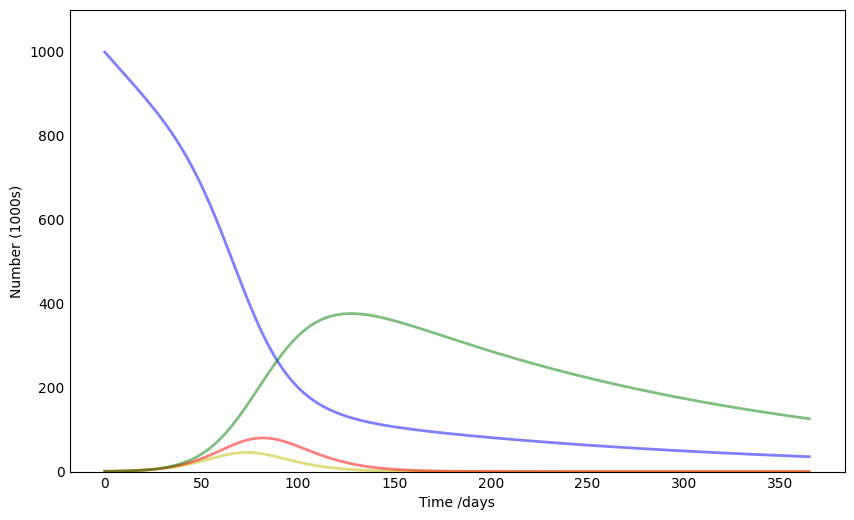

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SEIR model differential equations.
def SEIR_transport(y, t, N, beta, sigma, gamma, tau_o, tau_i):
    S, E, I, R = y
    dSdt = -beta * S * I / N - tau_o * S + tau_i * S
    dEdt = beta * S * I / N - sigma * E - tau_o * E + tau_i * E
    dIdt = sigma * E - gamma * I - tau_o * I + tau_i * I
    dRdt = gamma * I - tau_o * R + tau_i * R
    return dSdt, dEdt, dIdt, dRdt

# Initial number of infected, exposed, and recovered individuals, everyone else is susceptible to infection.
N = 1000  # Total population
I0 = 1
E0 = 0
R0 = 0
S0 = N - E0 - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
# Incubation rate, sigma, (in 1/days).
beta, sigma, gamma = 0.3, 1./5., 1./10.

# Transport out and in rates (for simplicity, we'll assume a small constant rate)
tau_o, tau_i = 0.01, 0.005

# A grid of time points (in days)
t = np.linspace(0, 365, 365)

# Integrate the SEIR equations over the time grid, t.
y0 = S0, E0, I0, R0
ret = odeint(SEIR_transport, y0, t, args=(N, beta, sigma, gamma, tau_o, tau_i))
S, E, I, R = ret.T

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, N+100)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(borderpad=2.0)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title("SEIR Model with Transport")
plt.show()
